In [1]:
from DataGathering import CSVData
from v4FeatureBuilder import FeatureData
from FeatureAndSplitting import Feature_and_Splitting
from Results import PredictionResults
from ModelStats import Statistics
from RandomForest import RandomForestAlgorithm

import time
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
plt.style.use('ggplot')

In [3]:
csv_dir = 'C:\\Users\\leand\\Desktop\\Resources\\Data\\Forex\\Oanda\\Daily\\'
# symbols = ['eurusd', 'gbpusd', 'audusd', 'usdchf', 'usdjpy', 'eurjpy', 'eurgbp', 
#            'euraud', 'eurchf', 'audcad', 'audchf', 'cadchf', 'audjpy', 'cadjpy', 
#            'eurcad', 'usdcad', 'gbpaud', 'gbpchf', 'gbpcad', 'gbpjpy']
symbols = ['eurusd', 'gbpusd', 'audusd', 'usdchf', 'eurgbp']

In [4]:
kind = 'Classification'

In [5]:
if __name__ == '__main__':
    start_all = time.perf_counter()
    
    get_data = time.perf_counter()
    csv = CSVData(csv_dir, symbols, '2008', '2019', 'Forex')
    print("Gathering Data...\n")
    fx_data = csv.get_data()
    print("Gathering the data took: {:0.4f} seconds\n".format(time.perf_counter() - get_data))
    
    print("Structuring The Data...")
    print("-------------------------")
    structure_start = time.perf_counter()
    strc = FeatureData(fx_data, symbols, kind = kind)
    data = strc.main(True)
    print("Structuring the data took: {:0.4f} seconds\n".format(time.perf_counter() - structure_start))
    
    y_vals = data['Target']
    #y = y_vals.values
    X_vals = data.drop(['Target'], axis = 1)
    X = X_vals.values
        
    print("Gathering all data took: {:0.4f} seconds\n".format(time.perf_counter() - start_all))
    print("Number of rows:", len(data))
    print("Number of columns:", len(X_vals.columns))
    total = len(data) * len(data.columns)
    print("Total Data Points: {}".format(total))

Gathering Data...

Gathering the data took: 0.2768 seconds

Structuring The Data...
-------------------------
Creating Features...

Changing data type from 64-bit to 32-bit...
Type conversion took: 0.0021

Creating Bars...
Bar creation took: 3.5957

Taking Derivatives
Derivatives took: 0.7405

Creating Pin bars...
Pin Bar took: 0.4835

Taking percentage change...
Percentage change took: 0.2366

Taking STDV...
STDV took: 1.1604

Taking bar ohlc differences...
Bar Diff took: 1.3474

Getting bar percentages...
Bar percentages took: 0.4687

Creating the features took: 8.0387 seconds

Creating Target...

Loading EURUSD...
* EURUSD Completed in 0.0905 seconds

Loading GBPUSD...
* GBPUSD Completed in 0.0845 seconds

Loading AUDUSD...


C:\Users\leand\Desktop\Resources\Algorithms\Machine Learning\Modules\v4FeatureBuilder.py:248: RuntimeWarning: invalid value encountered in greater
  if data[s]['pct fut'][i] > 0.5:
C:\Users\leand\Desktop\Resources\Algorithms\Machine Learning\Modules\v4FeatureBuilder.py:250: RuntimeWarning: invalid value encountered in less
  elif data[s]['pct fut'][i] < -0.5:


* AUDUSD Completed in 0.0820 seconds

Loading USDCHF...
* USDCHF Completed in 0.0821 seconds

Loading EURGBP...
* EURGBP Completed in 0.0828 seconds

Concatinating Targets...
Target concatination completed in 0.3227 seconds

Cleaning and formating the data...
Clearning the data took: 2.1212 seconds
Structuring the data took: 10.9070 seconds

Gathering all data took: 11.3654 seconds

Number of rows: 16899
Number of columns: 2173
Total Data Points: 36738426


In [6]:
data

,bidopen,bidhigh,bidlow,bidclose,askopen,askhigh,asklow,askclose,open,high,...,Up 46,body 47,Up 47,body 48,Up 48,body 49,Up 49,body 50,Up 50,Target
date,,,,,,,,,,,,,,,,,,,,,
2008-02-28,1.51151,1.52296,1.50738,1.51930,1.51160,1.52305,1.50743,1.51939,1.511555,1.523005,...,1.0,0.012721,0.0,0.301285,1.0,0.624718,1.0,0.474919,1.0,0
2008-02-29,1.51935,1.52386,1.51431,1.51736,1.51944,1.52395,1.51440,1.51836,1.519395,1.523905,...,0.0,0.246217,1.0,0.012721,0.0,0.301285,1.0,0.624718,1.0,0
2008-03-02,1.51812,1.52207,1.51617,1.51992,1.51912,1.52307,1.51717,1.52012,1.518620,1.522570,...,1.0,0.720547,0.0,0.246217,1.0,0.012721,0.0,0.301285,1.0,0
2008-03-03,1.51991,1.52759,1.51573,1.51973,1.52011,1.52768,1.51582,1.51982,1.520010,1.527635,...,0.0,0.390311,1.0,0.720547,0.0,0.246217,1.0,0.012721,0.0,0
2008-03-04,1.51978,1.52491,1.51733,1.52069,1.51987,1.52500,1.51742,1.52078,1.519825,1.524955,...,1.0,0.437022,0.0,0.390311,1.0,0.720547,0.0,0.246217,1.0,0
2008-03-05,1.52064,1.53018,1.51454,1.52770,1.52073,1.53027,1.51463,1.52779,1.520685,1.530225,...,0.0,0.795223,1.0,0.437022,0.0,0.390311,1.0,0.720547,0.0,1
2008-03-06,1.52771,1.53954,1.52723,1.53838,1.52780,1.53963,1.52732,1.53847,1.527755,1.539585,...,1.0,0.390823,0.0,0.795223,1.0,0.437022,0.0,0.390311,1.0,0
2008-03-07,1.53843,1.54575,1.53143,1.53507,1.53852,1.54675,1.53152,1.53607,1.538475,1.546250,...,1.0,0.626439,1.0,0.390823,0.0,0.795223,1.0,0.437022,0.0,0
2008-03-09,1.53457,1.54001,1.53452,1.53892,1.53557,1.54101,1.53552,1.53992,1.535070,1.540510,...,0.0,0.517711,1.0,0.626439,1.0,0.390823,0.0,0.795223,1.0,0


Feature Selection...
-------------------------
Selected Features:


<Figure size 720x504 with 0 Axes>

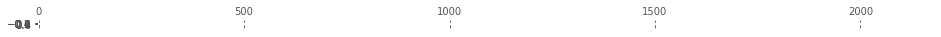

Feature Selection took: 2.5289 seconds

Number of new features: 140
Total Data Points: 2365860


In [7]:
print("Feature Selection...")
print("-------------------------")
start_all = time.perf_counter()
FnS = Feature_and_Splitting(X, y_vals, test_size = 0.20)
X_train, X_test, y_train, y_test = FnS.train_split()
if kind == 'Regression':
    X_train_selected, X_test_selected, y_train_sc, y_test_sc, scaler_X, scaler_y, selected, test_y = FnS.get_features(
        amount = 140, model = kind, fit = 'Test')
else:
    X_train_selected, X_test_selected, scaler_X, scaler_y, selected = FnS.get_features(
        amount = 140, model = kind, fit = 'Test')
chosen, new_feat, dropped = FnS.show_kept_features(X_vals)
print("Feature Selection took: {:0.4f} seconds\n".format(time.perf_counter() - start_all))
print("Number of new features:", len(new_feat))
rows = len(data)
cols = len(new_feat)

total = rows * cols
print("Total Data Points: {}".format(total))

In [8]:
new_feat

['high - derivative',
 'low - derivative',
 'close - derivative',
 'open STDV 6',
 'low STDV 13',
 'low STDV 14',
 'low STDV 15',
 'low STDV 16',
 'open STDV 16',
 'close STDV 17',
 'low STDV 17',
 'open STDV 17',
 'close STDV 18',
 'low STDV 18',
 'open STDV 18',
 'close STDV 19',
 'low STDV 19',
 'open STDV 19',
 'close STDV 20',
 'high STDV 20',
 'low STDV 20',
 'open STDV 20',
 'close STDV 21',
 'high STDV 21',
 'low STDV 21',
 'open STDV 21',
 'close STDV 22',
 'low STDV 22',
 'open STDV 22',
 'close STDV 23',
 'high STDV 23',
 'low STDV 23',
 'open STDV 23',
 'close STDV 24',
 'low STDV 24',
 'open STDV 24',
 'close STDV 25',
 'low STDV 25',
 'open STDV 25',
 'close STDV 26',
 'low STDV 26',
 'open STDV 26',
 'close STDV 27',
 'low STDV 27',
 'open STDV 27',
 'close STDV 28',
 'low STDV 28',
 'open STDV 28',
 'close STDV 29',
 'low STDV 29',
 'open STDV 29',
 'close STDV 30',
 'low STDV 30',
 'open STDV 30',
 'close STDV 31',
 'low STDV 31',
 'open STDV 31',
 'close STDV 32',
 'h

Random Forest Estimator: 25 of 100
Random Forest Estimator: 50 of 100
Random Forest Estimator: 75 of 100
Random Forest Estimator: 100 of 100


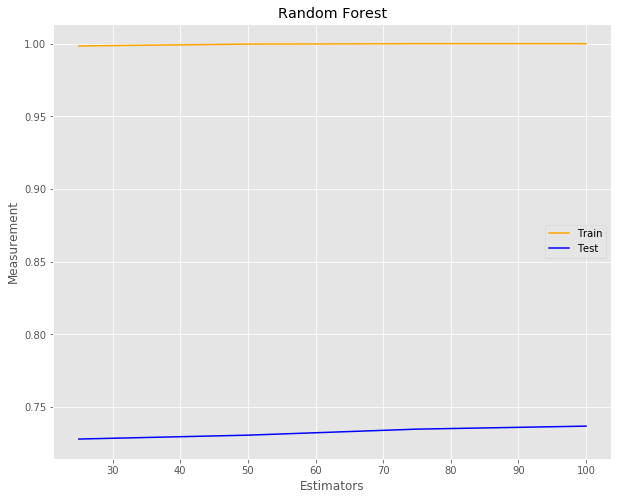

Took: 7.756464399999999 seconds


In [9]:
start = time.perf_counter()

rf = RandomForestAlgorithm(X_train_selected, X_test_selected, y_train, y_test)

n_jobs = -1
n_estimators = 100
step_factor = 25
axis_step = int(n_estimators/step_factor)
if kind == 'Regression':
    train_res, test_res, estimators, last_model = rf.random_forest_regressor(n_jobs, n_estimators, step_factor, axis_step)
    rf.graph(train_res, test_res, estimators)

else:
    train_res, test_res, estimators, last_model = rf.random_forest_classifier(n_jobs, n_estimators, step_factor, axis_step)
    rf.graph(train_res, test_res, estimators)

print("Took: {} seconds".format(time.perf_counter() - start))

In [10]:
# This is separate so the best number of trees can be chosen after viewing which works best
trees = 50
if kind == 'Regression':
    Model = RandomForestRegressor(n_estimators = trees)
    Model.fit(X_train_selected, y_train)
else:
    Model = RandomForestClassifier(n_estimators = trees)
    Model.fit(X_train_selected, y_train)

In [11]:
dropped_index = []
for ind, e in zip(range(len(selected.get_support())), selected.get_support()):
    if e == False:
        dropped_index.append(ind)
        
def dropforFolds(X_data, dropped_index):
    X_df = pd.DataFrame(scaler_X.transform(X_data))
    X_all = X_df.drop(dropped_index, axis = 1)
    return X_all

X_all = dropforFolds(X_vals, dropped_index)

C:\Users\leand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, float32, float64 were all converted to float64 by StandardScaler.
  import sys


In [12]:
start = time.perf_counter()

scores = cross_val_score(Model, X_all, y_vals, cv = 10, n_jobs = -1)

print("k-Fold took: {} seconds".format(time.perf_counter() - start))

k-Fold took: 8.467097499999998 seconds


In [13]:
scores

array([0.74807806, 0.75872265, 0.73506801, 0.76049675, 0.74452986,
       0.71284784, 0.7294257 , 0.73475429, 0.73475429, 0.72097156])

In [14]:
y_test

date
2012-07-06    0
2012-05-28    0
2018-05-09    1
2008-12-08    1
2011-03-29    0
2008-09-25    0
2012-10-01    0
2010-01-19   -1
2012-03-26    0
2011-02-21   -1
2010-03-07   -1
2015-03-02    1
2012-04-05    0
2013-01-18    0
2017-05-21    0
2017-06-05    0
2011-04-28    0
2014-01-15    0
2013-11-24    0
2010-09-09    0
2012-07-19    0
2008-06-19   -1
2009-12-30    0
2014-01-24    0
2011-04-10   -1
2015-10-04    1
2010-03-23   -1
2014-10-20   -1
2008-05-01    0
2018-01-16   -1
             ..
2018-06-03    0
2011-07-20    1
2011-04-27    1
2010-06-14    0
2009-11-08    1
2014-11-27    0
2012-07-02    0
2016-07-06    0
2009-09-08    0
2017-11-26    0
2012-07-01   -1
2009-04-30    0
2011-04-05    1
2011-10-24    0
2008-04-02    0
2018-11-27    1
2010-08-06    0
2014-10-30   -1
2015-09-28    0
2009-10-07    1
2017-05-15    0
2016-10-10    1
2017-09-11    1
2014-02-20    0
2011-02-18    0
2012-03-05   -1
2008-02-29    0
2013-03-05   -1
2010-04-02    0
2012-01-26    0
Name: Target, Lengt

In [15]:
# ONLY WORKS WITH CLASSIFICATION

S = Statistics(X_test_selected, y_test, Model, new_feat, scores)
stats = S.statistics()
#S.save_file('TomorrowDailyPriceDoubleRF')

In [16]:
stats['Accuracy']

{'All': 0.7363905325443787,
 'Bull': 0.6350877192982456,
 'Bear': 0.6169154228855721,
 'Stalled': 0.7546648237733241,
 'STDV': 0.014510373173868791}

In [17]:
# ONLY WORKS WITH RANDOM FOREST

def model_feature_importances(model, model_features):
    importances = list(model.feature_importances_)
    feature_importances = [(feature, round(importance, 3))
                           for feature, importance in zip(model_features, importances)]
    sorted_feats = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    return sorted_feats

In [18]:
model_feat = model_feature_importances(Model, new_feat)

In [19]:
model_feat

[('close - derivative', 0.124),
 ('high - derivative', 0.054),
 ('low - derivative', 0.048),
 ('high - low 5', 0.018),
 ('high - low 17', 0.018),
 ('high - low 11', 0.016),
 ('high - low 23', 0.016),
 ('high - low 29', 0.015),
 ('high - low 35', 0.014),
 ('high - low 41', 0.014),
 ('high - low 47', 0.014),
 ('high - close 5', 0.012),
 ('low - open 5', 0.011),
 ('open STDV 6', 0.01),
 ('low STDV 13', 0.008),
 ('low STDV 14', 0.007),
 ('low STDV 15', 0.007),
 ('low STDV 16', 0.007),
 ('close STDV 18', 0.007),
 ('low STDV 49', 0.007),
 ('open STDV 16', 0.006),
 ('close STDV 17', 0.006),
 ('low STDV 17', 0.006),
 ('open STDV 17', 0.006),
 ('low STDV 18', 0.006),
 ('open STDV 18', 0.006),
 ('close STDV 19', 0.006),
 ('low STDV 19', 0.006),
 ('high STDV 20', 0.006),
 ('high STDV 21', 0.006),
 ('low STDV 21', 0.006),
 ('open STDV 21', 0.006),
 ('high STDV 23', 0.006),
 ('high STDV 47', 0.006),
 ('high STDV 48', 0.006),
 ('low STDV 48', 0.006),
 ('high STDV 50', 0.006),
 ('low STDV 50', 0.006)